In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import CubicSplineInterpolator, EulerSolver

import pandas as pd

# 1. Модуль интерполяции

Данный модуль использует построение кубических сплайнов дефекта 1. 

Протестируем качество: возьмем отрезок $[-1; 1]$, сетки из 10 и 25 узлов, и 3 функции:

1. $\sin(2\pi x + 0.6)$


2. $\ln(1+e^x)$ 


3. $2x^4 + 0.15x^3 - 2.5x^2 + 0.5x - 0.3$ 

In [2]:
def spline_f1(x):
    return np.sin(2 * np.pi * x + 0.6)

def spline_f2(x):
    return np.log1p(np.exp(x))

def spline_f3(x):
    return 2*(x**4) + 0.15*(x**3) - 2.5*(x**2) + 0.5*x - 0.3

In [3]:
int_grid_1 = np.linspace(-1, 1, 10)
int_grid_2 = np.linspace(-1, 1, 25)
f_grid = np.linspace(-1, 1, 100)

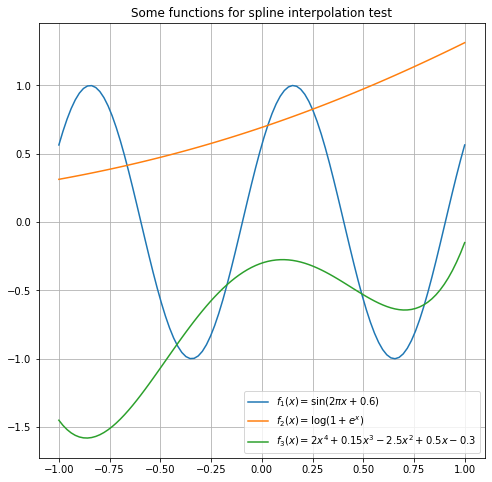

In [4]:
plt.figure(figsize=(8,8))
plt.plot(f_grid, spline_f1(f_grid), label=r'$f_1(x) = \sin(2\pi x + 0.6)$')
plt.plot(f_grid, spline_f2(f_grid), label=r'$f_2(x) = \log(1+e^x)$')
plt.plot(f_grid, spline_f3(f_grid), label=r'$f_3(x) = 2x^4 + 0.15x^3 - 2.5x^2 + 0.5x - 0.3$')

plt.legend()
plt.grid()
plt.title('Some functions for spline interpolation test')
plt.show()

In [5]:
csi_1_1 = CubicSplineInterpolator(int_grid_1, spline_f1(int_grid_1))
csi_1_2 = CubicSplineInterpolator(int_grid_1, spline_f2(int_grid_1))
csi_1_3 = CubicSplineInterpolator(int_grid_1, spline_f3(int_grid_1))
csi_2_1 = CubicSplineInterpolator(int_grid_2, spline_f1(int_grid_2))
csi_2_2 = CubicSplineInterpolator(int_grid_2, spline_f2(int_grid_2))
csi_2_3 = CubicSplineInterpolator(int_grid_2, spline_f3(int_grid_2))

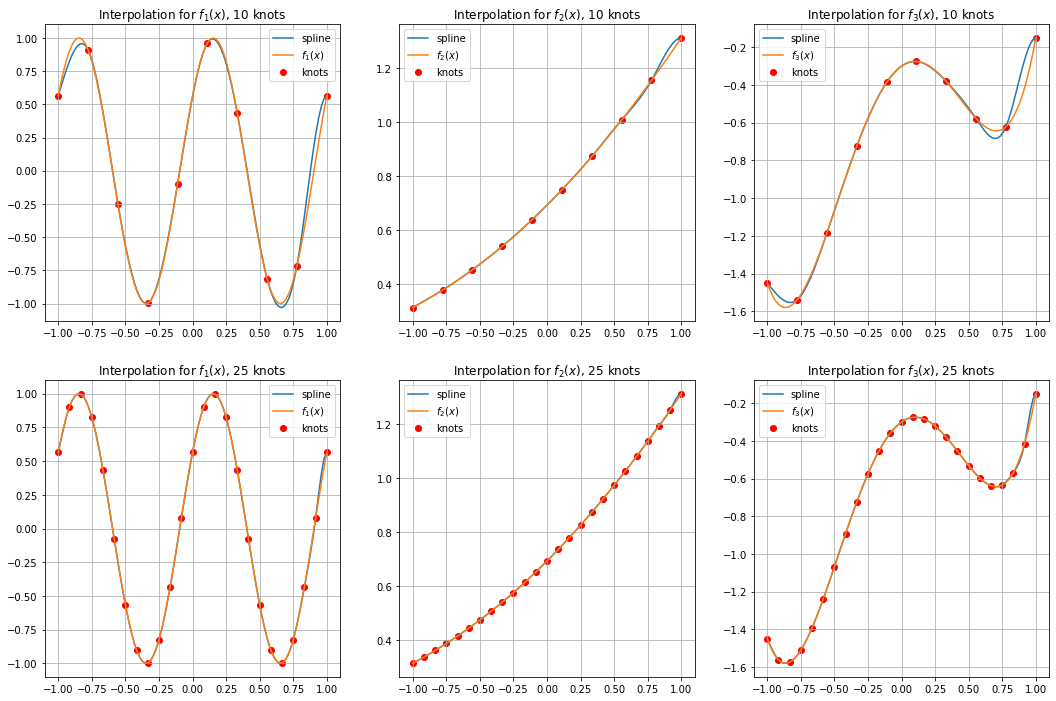

In [6]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18,12))
ax[0,0].plot(f_grid, csi_1_1.Compute(f_grid), label='spline')
ax[0,0].scatter(int_grid_1, spline_f1(int_grid_1), c='r', label='knots')
ax[0,0].plot(f_grid, spline_f1(f_grid), label='$f_1(x)$')
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title('Interpolation for $f_1(x)$, 10 knots')

ax[0,1].plot(f_grid, csi_1_2.Compute(f_grid), label='spline')
ax[0,1].scatter(int_grid_1, spline_f2(int_grid_1), c='r', label='knots')
ax[0,1].plot(f_grid, spline_f2(f_grid), label='$f_2(x)$')
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title('Interpolation for $f_2(x)$, 10 knots')

ax[0,2].plot(f_grid, csi_1_3.Compute(f_grid), label='spline')
ax[0,2].scatter(int_grid_1, spline_f3(int_grid_1), c='r', label='knots')
ax[0,2].plot(f_grid, spline_f3(f_grid), label='$f_3(x)$')
ax[0,2].grid()
ax[0,2].legend()
ax[0,2].set_title('Interpolation for $f_3(x)$, 10 knots')

ax[1,0].plot(f_grid, csi_2_1.Compute(f_grid), label='spline')
ax[1,0].scatter(int_grid_2, spline_f1(int_grid_2), c='r', label='knots')
ax[1,0].plot(f_grid, spline_f1(f_grid), label='$f_1(x)$')
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title('Interpolation for $f_1(x)$, 25 knots')

ax[1,1].plot(f_grid, csi_2_2.Compute(f_grid), label='spline')
ax[1,1].scatter(int_grid_2, spline_f2(int_grid_2), c='r', label='knots')
ax[1,1].plot(f_grid, spline_f2(f_grid), label='$f_2(x)$')
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title('Interpolation for $f_2(x)$, 25 knots')

ax[1,2].plot(f_grid, csi_2_3.Compute(f_grid), label='spline')
ax[1,2].scatter(int_grid_2, spline_f3(int_grid_2), c='r', label='knots')
ax[1,2].plot(f_grid, spline_f3(f_grid), label='$f_3(x)$')
ax[1,2].grid()
ax[1,2].legend()
ax[1,2].set_title('Interpolation for $f_3(x)$, 25 knots')

plt.show()

In [7]:
def spline_f1_der(x):
    return 2*np.pi*np.cos(2 * np.pi * x + 0.6)
def spline_f2_der(x):
    return 1/(1+np.exp(-x))
def spline_f3_der(x):
    return 8*x**3 + 0.45*x**2 - 5*x + 0.5

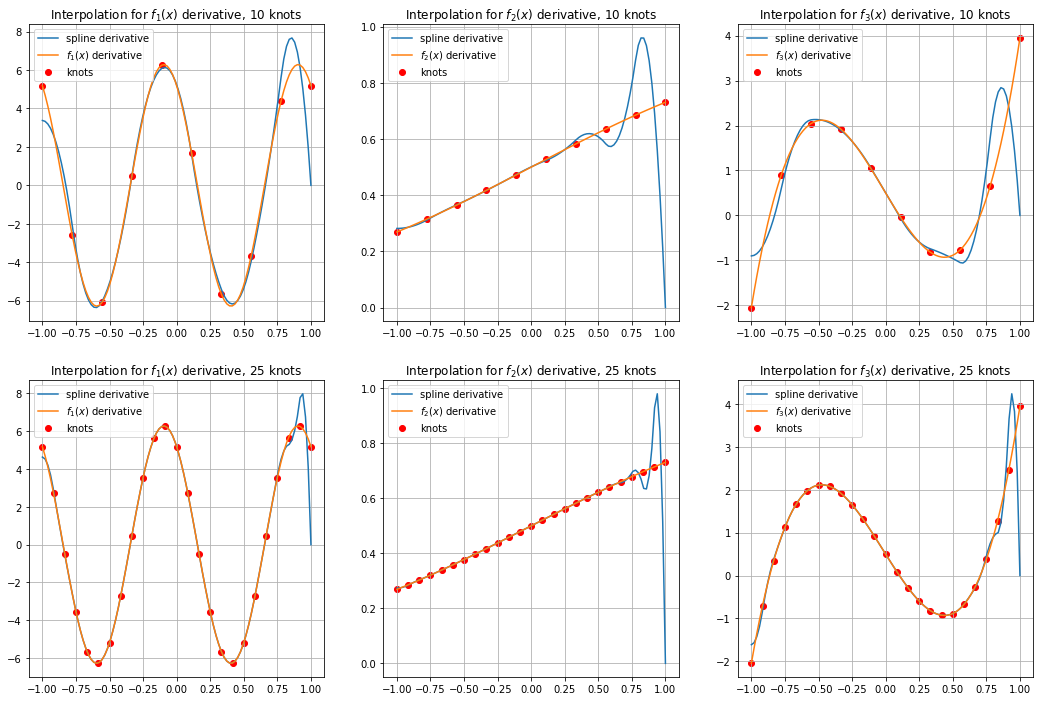

In [8]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18,12))
ax[0,0].plot(f_grid, csi_1_1.Derivative(f_grid), label='spline derivative')
ax[0,0].scatter(int_grid_1, spline_f1_der(int_grid_1), c='r', label='knots')
ax[0,0].plot(f_grid, spline_f1_der(f_grid), label='$f_1(x)$ derivative')
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title('Interpolation for $f_1(x)$ derivative, 10 knots')

ax[0,1].plot(f_grid, csi_1_2.Derivative(f_grid), label='spline derivative')
ax[0,1].scatter(int_grid_1, spline_f2_der(int_grid_1), c='r', label='knots')
ax[0,1].plot(f_grid, spline_f2_der(f_grid), label='$f_2(x)$ derivative')
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title('Interpolation for $f_2(x)$ derivative, 10 knots')

ax[0,2].plot(f_grid, csi_1_3.Derivative(f_grid), label='spline derivative')
ax[0,2].scatter(int_grid_1, spline_f3_der(int_grid_1), c='r', label='knots')
ax[0,2].plot(f_grid, spline_f3_der(f_grid), label='$f_3(x)$ derivative')
ax[0,2].grid()
ax[0,2].legend()
ax[0,2].set_title('Interpolation for $f_3(x)$ derivative, 10 knots')

ax[1,0].plot(f_grid, csi_2_1.Derivative(f_grid), label='spline derivative')
ax[1,0].scatter(int_grid_2, spline_f1_der(int_grid_2), c='r', label='knots')
ax[1,0].plot(f_grid, spline_f1_der(f_grid), label='$f_1(x)$ derivative')
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title('Interpolation for $f_1(x)$ derivative, 25 knots')

ax[1,1].plot(f_grid, csi_2_2.Derivative(f_grid), label='spline derivative')
ax[1,1].scatter(int_grid_2, spline_f2_der(int_grid_2), c='r', label='knots')
ax[1,1].plot(f_grid, spline_f2_der(f_grid), label='$f_2(x)$ derivative')
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title('Interpolation for $f_2(x)$ derivative, 25 knots')

ax[1,2].plot(f_grid, csi_2_3.Derivative(f_grid), label='spline derivative')
ax[1,2].scatter(int_grid_2, spline_f3_der(int_grid_2), c='r', label='knots')
ax[1,2].plot(f_grid, spline_f3_der(f_grid), label='$f_3(x)$ derivative')
ax[1,2].grid()
ax[1,2].legend()
ax[1,2].set_title('Interpolation for $f_3(x)$ derivative, 25 knots')

plt.show()

# 2. Модуль интегрирования. 

Данный модуль реализован, опять же, с помощью сплайн-интерполяции. По полученному интерполирующему сплайну определенный интеграл посчитать несложно, так как он является полиномом.

Проверим качество интегрирования с использованием заданных ранее модельных функций и высокоточного результата интегрирования, полученного с помощью `scipy.integrate`.

In [9]:
import scipy.integrate as integrate

true_int1 = integrate.quad(spline_f1, -1, 1)[0]
true_int2 = integrate.quad(spline_f2, -1, 1)[0]
true_int3 = integrate.quad(spline_f3, -1, 1)[0]

In [10]:
ints = [[], [], []]

for n_knots in np.arange(5, 101, 5):
    grid = np.linspace(-1, 1, n_knots)
    
    csi1 = CubicSplineInterpolator(grid, spline_f1(grid))
    csi2 = CubicSplineInterpolator(grid, spline_f2(grid))
    csi3 = CubicSplineInterpolator(grid, spline_f3(grid))
    
    ints[0].append(csi1.Integrate(-1, 1))
    ints[1].append(csi2.Integrate(-1, 1))
    ints[2].append(csi3.Integrate(-1, 1))
    

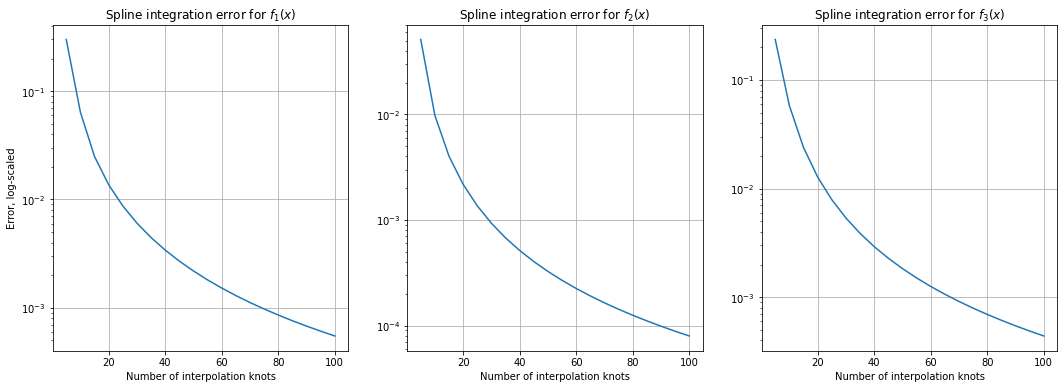

In [11]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((18,6))

ax[0].plot(np.arange(5, 101, 5), np.abs(np.array(ints[0]) - true_int1))
ax[0].set_title('Spline integration error for $f_1(x)$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].set_ylabel('Error, log-scaled')
ax[0].set_xlabel('Number of interpolation knots')

ax[1].plot(np.arange(5, 101, 5), np.abs(np.array(ints[1]) - true_int2))
ax[1].set_title('Spline integration error for $f_2(x)$')
ax[1].set_yscale('log')
ax[1].grid()
ax[1].set_xlabel('Number of interpolation knots')

ax[2].plot(np.arange(5, 101, 5), np.abs(np.array(ints[2]) - true_int3))
ax[2].set_title('Spline integration error for $f_3(x)$')
ax[2].set_yscale('log')
ax[2].grid()
ax[2].set_xlabel('Number of interpolation knots')

plt.show()

# 3. Модуль решения систем ОДУ. 

Реализован метод Эйлера для решения задачи Коши в системе из двух уравнений. 

Протестируем его на следующей системе:

\begin{align}
\begin{cases}
\frac{dx}{dt} = y(t)\\
\\
\frac{dy}{dt} = x(t)\\
\\
y(0) = 0, x(0) = 1\\
\end{cases}
\end{align}

Вот так выглядит точное решение в данном случае: 

$$x(t) = \frac{1}{2} \left(e^t + e^{-t}\right)$$ 

$$y(t) = \frac{1}{2} \left(e^t - e^{-t}\right)$$ 

In [12]:
def xdot(x, y, t, beta):
    return y
def ydot(x, y, t, beta):
    return x

In [13]:
splx, sply = EulerSolver(xdot, ydot, x_0=1, y_0=0, T=1, t_0=0, h=1e-2)

In [14]:
grid = np.linspace(0, 1, 100)

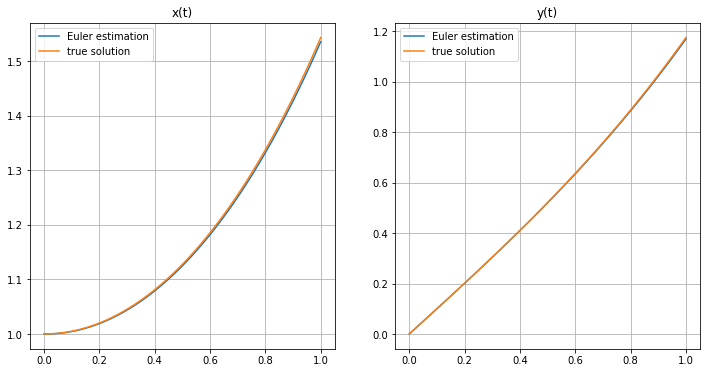

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12,6))

ax[0].plot(grid, splx.Compute(grid), label='Euler estimation')
ax[0].plot(grid, 0.5 * (np.exp(grid) + np.exp(-grid)), label='true solution')
ax[0].grid()
ax[0].legend()
ax[0].set_title('x(t)')

ax[1].plot(grid, sply.Compute(grid), label='Euler estimation')
ax[1].plot(grid, 0.5 * (np.exp(grid) - np.exp(-grid)), label='true solution')
ax[1].grid()
ax[1].legend()
ax[1].set_title('y(t)')

plt.show()

Оценим суммарную погрешность решения с использованием правила Рунге:

In [16]:
splx_run, sply_run = EulerSolver(xdot, ydot, x_0=1, y_0=0, T=1, t_0=0, h=0.5*1e-2)

In [17]:
x_err = np.abs(splx.Compute([1]) - splx_run.Compute([1]))/3
y_err = np.abs(sply.Compute([1]) - sply_run.Compute([1]))/3

print('Runge error estimation: {:.4f}'.format(x_err + y_err))

Runge error estimation: 0.0022


# 4. Решаемая задача. 

Имитируется поведение рекламного сервера. 

Загрузка табличных функций, начальных приближений и т.п.

In [18]:
Rho_df = pd.read_csv('RHO.csv')
Rho_func = CubicSplineInterpolator(Rho_df.w.values, Rho_df.rho.values)

S_df = pd.read_csv('S.csv')
S_func = CubicSplineInterpolator(S_df.t.values, S_df.S.values)

z_df = pd.read_csv('z.csv')
z_func = CubicSplineInterpolator(z_df.t.values, z_df.z.values)

Теперь будем смотреть для большого значения T; впрочем, оно должно быть представлено в таблице значений функций

In [19]:
beta = 0.01
x_0 = 0.0
y_0 = 0.0
t_0 = 0.0
T = 10.0 
assert T <= S_df.t.values.max()
h = 1e-2

In [20]:
def f(b, z, x, S):
    return b*(z-x)

def dx_dt(x, y, t, beta):
    return Rho_func.Integrate(y, 1) * z_func.Derivative([t])

def dy_dt(x, y, t, beta):
    return f(beta, z_func.Compute([t]), x, S_func.Compute([t]))

С помощью метода Эйлера и ограничения на $y \in [0;1]$ попробуем решить систему:

In [21]:
splx, sply = EulerSolver(dx_dt, dy_dt, x_0=x_0, y_0=y_0, T=T, t_0=t_0, h=h, beta=beta, y_bound=1)

Оценим значение оптимизируемого функционала при данном $\beta$:

In [22]:
def C1(beta, splx, sply):
    def __int(t):
        expect_grid = Rho_df.w.values * Rho_df.rho.values
        expect_func = CubicSplineInterpolator(Rho_df.w.values, expect_grid)
        integ = expect_func.Integrate(sply.Compute([t]), 1)
        return integ
        
    integ_grid = np.arange(t_0, T + 1e-9, h)
    integ_values = np.array([dx_dt(0, sply.Compute([t]), t, 0) * __int(t) for t in integ_grid])
    integ = CubicSplineInterpolator(integ_grid, integ_values).Integrate(t_0, T)
    return 1 - 1/(splx.Compute([T]) - x_0) * integ

def C2(beta, splx, sply):
    return np.abs(S_func.Compute([T]) - splx.Compute([T]))/S_func.Compute([T])

def PHI(beta, splx, sply):
    return C1(beta, splx, sply) + 10*C2(beta, splx, sply)

In [23]:
PHI(beta, splx, sply)

3.318391774434317

Попробуем с помощью перебора найти оптимальное $\beta$.

In [24]:
from tqdm import tqdm
phis = []
beta_range = np.logspace(-4, 0, 21)
for beta_value in tqdm(beta_range):
    splx, sply = EulerSolver(dx_dt, dy_dt, x_0=x_0, y_0=y_0, T=T, t_0=t_0, h=h, beta=beta_value, y_bound=1)
    phis.append(PHI(beta_value, splx, sply))

100%|██████████| 21/21 [01:01<00:00,  2.92s/it]


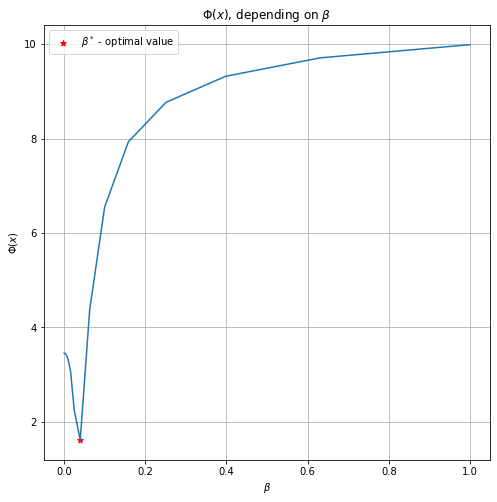

In [25]:
plt.figure(figsize=(8,8))
plt.title(r'$\Phi(x)$, depending on $\beta$')
plt.plot(beta_range, phis)
plt.scatter(beta_range[np.argmin(phis)], phis[np.argmin(phis)], c='r', marker='*', label=r'$\beta^*$ - optimal value')
plt.legend()
plt.ylabel(r'$\Phi(x)$')
plt.xlabel(r'$\beta$')
plt.grid()

In [26]:
print('beta_opt: {:.4f}'.format(beta_range[np.argmin(phis)]))
print('Phi@beta_opt: {:.4f}'.format(phis[np.argmin(phis)]))

beta_opt: 0.0398
Phi@beta_opt: 1.6129


Теперь поищем оптимальные начальные условия $x_0, y_0$:

In [27]:
beta_opt = beta_range[np.argmin(phis)]
x0s = np.arange(0, 1+1e-8, 0.1)
y0s = np.arange(0, 1+1e-8, 0.1)

In [28]:
diffs = np.zeros((x0s.size, y0s.size))

for i, x_0 in enumerate(x0s):
    for j, y_0 in enumerate(y0s):
        splx, sply = EulerSolver(dx_dt, dy_dt, x_0=x_0, y_0=y_0, T=T, t_0=t_0, h=h, beta=beta_opt, y_bound=1)
        diffs[i, j] = np.abs(splx.Compute([T]) - S_func.Compute([T]))

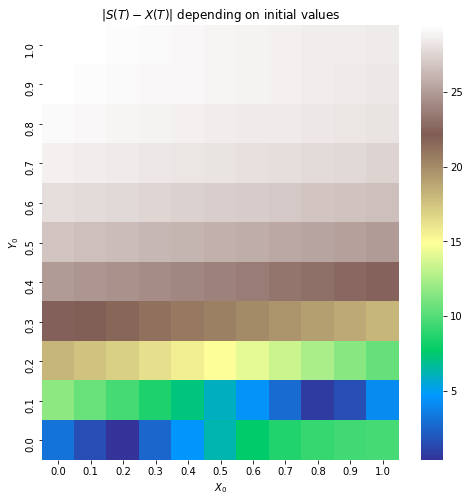

In [29]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(diffs.T[::-1,:], xticklabels=np.round(x0s, 2), yticklabels=np.round(y0s, 2)[::-1], cmap='terrain')
plt.xlabel(r'$X_0$')
plt.ylabel(r'$Y_0$')
plt.title(r'$|S(T) - X(T)|$ depending on initial values')
plt.show()

Построим примеры траекторий в двух наиболее оптимальных начальных приближениях, а также в плохом:

In [30]:
x_01, y_01 = 0.2, 0.0
x_02, y_02 = 0.8, 0.1
x_03, y_03 = 0.5, 0.5

In [31]:
splx1, sply1 = EulerSolver(dx_dt, dy_dt, x_0=x_01, y_0=y_01, T=T, t_0=t_0, h=h, beta=beta_opt, y_bound=1)
splx2, sply2 = EulerSolver(dx_dt, dy_dt, x_0=x_02, y_0=y_02, T=T, t_0=t_0, h=h, beta=beta_opt, y_bound=1)
splx3, sply3 = EulerSolver(dx_dt, dy_dt, x_0=x_03, y_0=y_03, T=T, t_0=t_0, h=h, beta=beta_opt, y_bound=1)

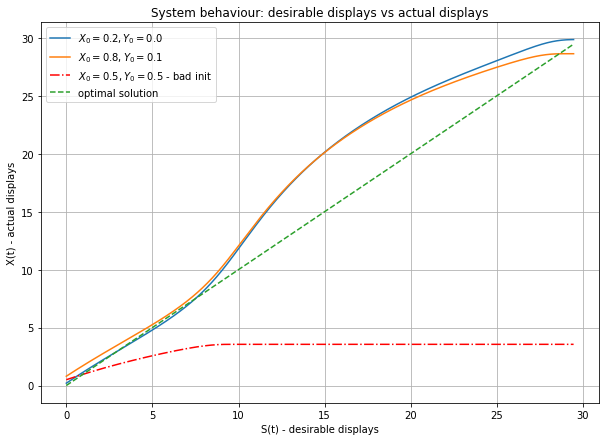

In [32]:
tgrid = np.arange(t_0, T+1e-8, 1e-3)
plt.figure(figsize=(10,7))
plt.plot(S_func.Compute(tgrid), splx1.Compute(tgrid), label=r'$X_0 = {}, Y_0 = {}$'.format(x_01, y_01))
plt.plot(S_func.Compute(tgrid), splx2.Compute(tgrid), label=r'$X_0 = {}, Y_0 = {}$'.format(x_02, y_02))
plt.plot(S_func.Compute(tgrid), splx3.Compute(tgrid), color='r', linestyle='-.', label=r'$X_0 = {}, Y_0 = {}$ - bad init'.format(x_03, y_03))
plt.plot(S_func.Compute(tgrid), S_func.Compute(tgrid), linestyle='--', label=r'optimal solution')

plt.legend()
plt.xlabel('S(t) - desirable displays')
plt.ylabel('X(t) - actual displays')
plt.title('System behaviour: desirable displays vs actual displays')
plt.grid()

In [33]:
# discretization 
"""def z(t):
    return 4*t + np.cos(t)
    
def S(t):
    return 3*t + np.sin(t)

tgr = np.arange(0, 100 + 1e-9, 1e-2)

pd.DataFrame([tgr, z(tgr)]).transpose().rename(columns={0: 't', 1:'z'}).to_csv('z.csv')

pd.DataFrame([tgr, S(tgr)]).transpose().rename(columns={0: 't', 1:'S'}).to_csv('S.csv')""";